# Twitter Sentiment Analysis- Deep Learning
The objective of this project is to build an NLP-based Classification model which can predict Tweets as Hate Speech, Offensive Language, and Normal.

##### Dataset
The datset is from kaggle. 
https://www.kaggle.com/datasets/mrmorj/hate-speech-and-offensive-language-dataset/data
    

# Importing Libraries

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.model_selection import train_test_split
 
# Text Pre-processing libraries
import nltk
import string
import warnings
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from wordcloud import WordCloud
 
import tensorflow as tf
from tensorflow import keras
from keras import layers
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
 
nltk.download('stopwords')
nltk.download('omw-1.4')
nltk.download('wordnet')
warnings.filterwarnings('ignore')

# Data exploration

In [10]:
df = pd.read_csv('kavyapan/projects/twitter-sentiment/kaggle_data.csv')
df.head()

,Unnamed: 0,count,hate_speech,offensive_language,neither,class,tweet
0,0,3,0,0,3,2,!!! RT @mayasolovely: As a woman you shouldn't...
1,1,3,0,3,0,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...
2,2,3,0,3,0,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...
3,3,3,0,2,1,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...
4,4,6,0,6,0,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...


In [11]:
df.shape

(24783, 7)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24783 entries, 0 to 24782
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Unnamed: 0          24783 non-null  int64 
 1   count               24783 non-null  int64 
 2   hate_speech         24783 non-null  int64 
 3   offensive_language  24783 non-null  int64 
 4   neither             24783 non-null  int64 
 5   class               24783 non-null  int64 
 6   tweet               24783 non-null  object
dtypes: int64(6), object(1)
memory usage: 1.3+ MB


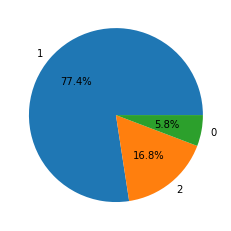

In [13]:
plt.pie(df['class'].value_counts().values,
labels = df['class'].value_counts().index,
autopct='%1.1f%%')
plt.show()

##### The three labels are: 0 - Hate Speech , 1 - Offensive Language, 2 - Neither

# Text Data Preprocessing

In [14]:
# Converting all the words of the tweet into lowercase before any preprocessing
df['tweet'] = df['tweet'].str.lower()
 
# Removing punctuations present in the text
punc_list = string.punctuation
def rem_punc(text):
    temp = str.maketrans('', '', punc_list)
    return text.translate(temp)
 
df['tweet']= df['tweet'].apply(lambda x: rem_punc(x))
df.head()

,Unnamed: 0,count,hate_speech,offensive_language,neither,class,tweet
0,0,3,0,0,3,2,rt mayasolovely as a woman you shouldnt compl...
1,1,3,0,3,0,1,rt mleew17 boy dats coldtyga dwn bad for cuff...
2,2,3,0,3,0,1,rt urkindofbrand dawg rt 80sbaby4life you eve...
3,3,3,0,2,1,1,rt cganderson vivabased she look like a tranny
4,4,6,0,6,0,1,rt shenikaroberts the shit you hear about me ...


In [15]:
# Helper function that will help to remove the stop words and Lemmatize the important words
def rem_stopwords(text):
    stop_words = stopwords.words('english')
    imp_words = []
    for word in str(text).split():
        if word not in stop_words:
            lemmatizer = WordNetLemmatizer()
            lemmatizer.lemmatize(word)
            imp_words.append(word)
    output = " ".join(imp_words)
    return output

df['tweet'] = df['tweet'].apply(lambda text: rem_stopwords(text))
df.head()


,Unnamed: 0,count,hate_speech,offensive_language,neither,class,tweet
0,0,3,0,0,3,2,rt mayasolovely woman shouldnt complain cleani...
1,1,3,0,3,0,1,rt mleew17 boy dats coldtyga dwn bad cuffin da...
2,2,3,0,3,0,1,rt urkindofbrand dawg rt 80sbaby4life ever fuc...
3,3,3,0,2,1,1,rt cganderson vivabased look like tranny
4,4,6,0,6,0,1,rt shenikaroberts shit hear might true might f...


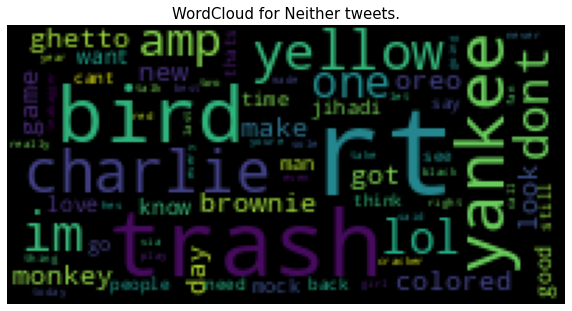

In [16]:
# Word cloud is a text visualization tool that helps to get insights into the most frequent words present in the corpus of data.

def plot_wordcloud(data, typ):
    # Joining all the tweets to get the corpus
    email_corpus = " ".join(data['tweet'])

    plt.figure(figsize = (10,10))

    # Forming the word cloud
    wc = WordCloud(max_words = 100,width = 200,height = 100,collocations = False).generate(email_corpus)

    # Plotting the wordcloud obtained above
    plt.title(f'WordCloud for {typ} tweets.', fontsize = 15)
    plt.axis('off')
    plt.imshow(wc)
    plt.show()
    print()

plot_wordcloud(df[df['class']==2], typ='Neither')


In [17]:
# Will use mixture of down sampling and up sampling as data we have is imbalanced.
class_2 = df[df['class'] == 2]
class_1 = df[df['class'] == 1].sample(n=3500)
class_0 = df[df['class'] == 0]

balanced_df = pd.concat([class_0, class_0, class_0, class_1, class_2], axis=0)


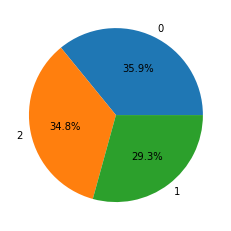

In [18]:
plt.pie(balanced_df['class'].value_counts().values,labels=balanced_df['class'].value_counts().index, autopct='%1.1f%%')
plt.show()


# Coverting words to vectors

In [19]:
features = balanced_df['tweet']
target = balanced_df['class']

X_train, X_val, Y_train, Y_val = train_test_split(features,target,test_size=0.2,random_state=42)
X_train.shape, X_val.shape


((9562,), (2391,))

In [20]:
Y_train = pd.get_dummies(Y_train)
Y_val = pd.get_dummies(Y_val)
Y_train.shape, Y_val.shape

((9562, 3), (2391, 3))

In [21]:
# declare the tokenizer
tokenizer = Tokenizer()
# build the vocabulary based on train dataset
tokenizer.fit_on_texts(X_train)
# tokenize the train and test dataset
X_train = tokenizer.texts_to_sequences(X_train)
X_val = tokenizer.texts_to_sequences(X_val)

# vocabulary size (num of unique words) -> will be used in embedding layer
vocab_size = len(tokenizer.word_index) + 1


In [22]:
# Padding 
max_length = max(len(seq) for seq in X_train)

# to test an outlier case (if one of the test dataset has longer length)
for x in X_val:
    if len(x) > max_length:
        print(f"an outlier detected: {x}")

X_train = pad_sequences(X_train, maxlen = max_length)
X_val = pad_sequences(X_val, maxlen = max_length)


# Model Training and Evaluation

## Model-1 

In [23]:
output_dim = 200

# LSTM model architechture (CNN + LSTM)
model = keras.models.Sequential([
    layers.Embedding(vocab_size, output_dim, input_length=max_length),
    layers.LSTM(64, dropout=0.3, recurrent_dropout=0.3),
    # dropout to prevent overfitting
    layers.Dropout(0.5),
    # dense to connect the previous output with current layer
    layers.Dense(128, activation="relu"),
    layers.Dropout(0.5),
    # this is output layer, with 3 class (0, 1, 2)
    layers.Dense(3, activation="softmax"),
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 30, 200)           3937600   
_________________________________________________________________
lstm (LSTM)                  (None, 64)                67840     
_________________________________________________________________
dropout (Dropout)            (None, 64)                0         
_________________________________________________________________
dense (Dense)                (None, 128)               8320      
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 3)                 387       
Total params: 4,014,147
Trainable params: 4,014,147
Non-trainable params: 0
______________________________________________

In [24]:
# Callback
from keras.callbacks import EarlyStopping, ReduceLROnPlateau

es = EarlyStopping(patience=3,monitor = 'val_accuracy',restore_best_weights = True)

lr = ReduceLROnPlateau(patience = 2,monitor = 'val_loss',factor = 0.5,verbose = 0)


In [25]:
history = model.fit(X_train, Y_train,
                    validation_data=(X_val, Y_val),
                    epochs=50,
                    verbose=1,
                    batch_size=32,
                    callbacks=[lr, es])




Epoch 1/50
299/299 [==============================] - 30s 87ms/step - loss: 0.6780 - accuracy: 0.6984 - val_loss: 0.3769 - val_accuracy: 0.8515
Epoch 2/50
299/299 [==============================] - 27s 91ms/step - loss: 0.2022 - accuracy: 0.9299 - val_loss: 0.3047 - val_accuracy: 0.8963
Epoch 3/50
299/299 [==============================] - 26s 87ms/step - loss: 0.0667 - accuracy: 0.9773 - val_loss: 0.4324 - val_accuracy: 0.8904
Epoch 4/50
299/299 [==============================] - 27s 89ms/step - loss: 0.0287 - accuracy: 0.9913 - val_loss: 0.4730 - val_accuracy: 0.8858
Epoch 5/50
299/299 [==============================] - 26s 88ms/step - loss: 0.0141 - accuracy: 0.9962 - val_loss: 0.5430 - val_accuracy: 0.8992
Epoch 6/50
299/299 [==============================] - 28s 95ms/step - loss: 0.0090 - accuracy: 0.9976 - val_loss: 0.5114 - val_accuracy: 0.8980
Epoch 7/50
299/299 [==============================] - 27s 89ms/step - loss: 0.0047 - accuracy: 0.9988 - val_loss: 0.5913 - val_accuracy:

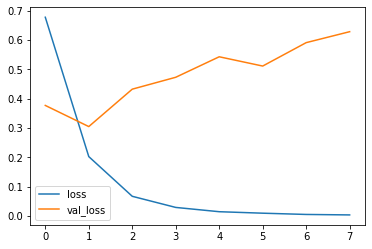

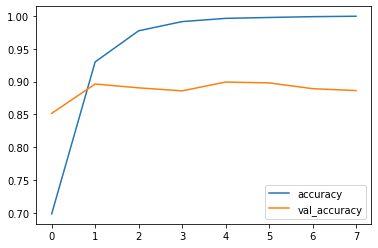

In [26]:
history_df = pd.DataFrame(history.history)
history_df.loc[:, ['loss', 'val_loss']].plot()
history_df.loc[:, ['accuracy', 'val_accuracy']].plot()
plt.show()

## Model-2

In [33]:
model = keras.models.Sequential([
    layers.Embedding(vocab_size, output_dim, input_length=max_length),
    layers.Bidirectional(layers.LSTM(16)),
    layers.Dense(512, activation='relu', kernel_regularizer='l1'),
    layers.BatchNormalization(),
    layers.Dropout(0.3),
    layers.Dense(3, activation='softmax')
])

model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

model.summary()


Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 30, 200)           3937600   
_________________________________________________________________
bidirectional_1 (Bidirection (None, 32)                27776     
_________________________________________________________________
dense_4 (Dense)              (None, 512)               16896     
_________________________________________________________________
batch_normalization_1 (Batch (None, 512)               2048      
_________________________________________________________________
dropout_3 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 3)                 1539      
Total params: 3,985,859
Trainable params: 3,984,835
Non-trainable params: 1,024
________________________________________

In [34]:
# Callback
from keras.callbacks import EarlyStopping, ReduceLROnPlateau

es = EarlyStopping(patience=3,monitor = 'val_accuracy',restore_best_weights = True)

lr = ReduceLROnPlateau(patience = 2,monitor = 'val_loss',factor = 0.5,verbose = 0)

In [35]:
history = model.fit(X_train, Y_train,
                    validation_data=(X_val, Y_val),
                    epochs=50,
                    verbose=1,
                    batch_size=32,
                    callbacks=[lr, es])

Epoch 1/50
299/299 [==============================] - 15s 40ms/step - loss: 1.7293 - accuracy: 0.7899 - val_loss: 0.8934 - val_accuracy: 0.8164
Epoch 2/50
299/299 [==============================] - 12s 39ms/step - loss: 0.2175 - accuracy: 0.9533 - val_loss: 0.3843 - val_accuracy: 0.8938
Epoch 3/50
299/299 [==============================] - 13s 43ms/step - loss: 0.1182 - accuracy: 0.9833 - val_loss: 0.3694 - val_accuracy: 0.9080
Epoch 4/50
299/299 [==============================] - 13s 43ms/step - loss: 0.0735 - accuracy: 0.9937 - val_loss: 0.3992 - val_accuracy: 0.9143
Epoch 5/50
299/299 [==============================] - 10s 35ms/step - loss: 0.0743 - accuracy: 0.9937 - val_loss: 0.4354 - val_accuracy: 0.9134
Epoch 6/50
299/299 [==============================] - 11s 36ms/step - loss: 0.0488 - accuracy: 0.9961 - val_loss: 0.4382 - val_accuracy: 0.9005
Epoch 7/50
299/299 [==============================] - 11s 36ms/step - loss: 0.0335 - accuracy: 0.9991 - val_loss: 0.4619 - val_accuracy:

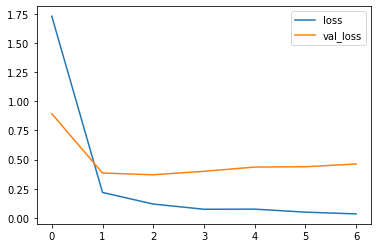

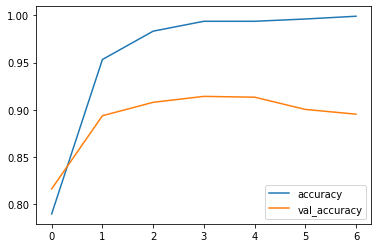

In [36]:
history_df = pd.DataFrame(history.history)
history_df.loc[:, ['loss', 'val_loss']].plot()
history_df.loc[:, ['accuracy', 'val_accuracy']].plot()
plt.show()